# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [6]:
df = pd.read_csv('/content/bikes_rent (1).csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

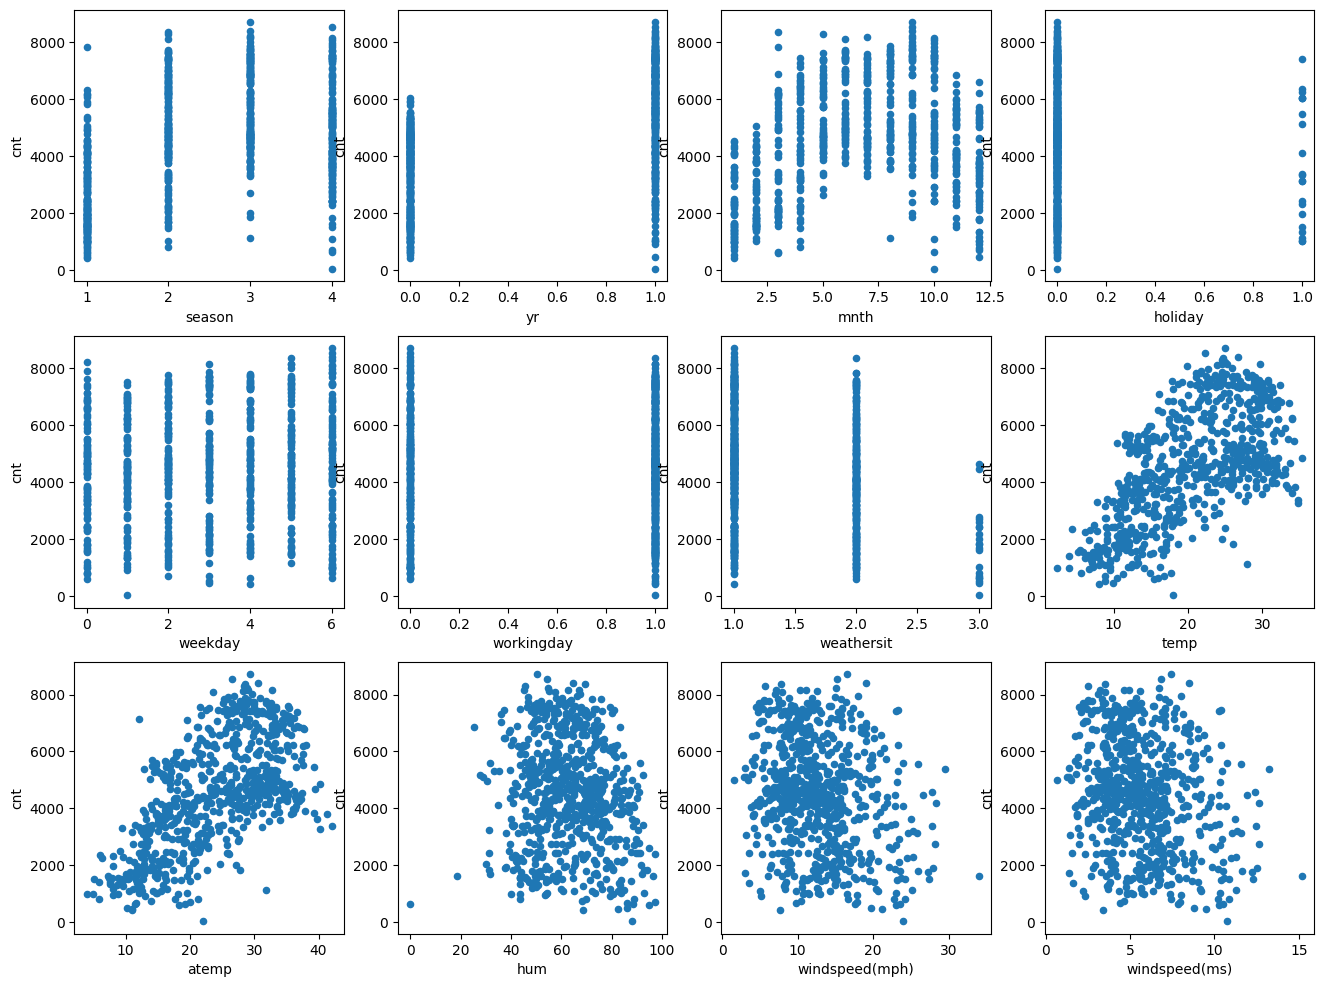

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ:

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ:

До середины года - прямая зависимость, после обратная.

 Погода и как она ощущается

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

меньше всего коррелирует с weekday,holiday,workday,hum; больше всего коррелирует с atemp, temp

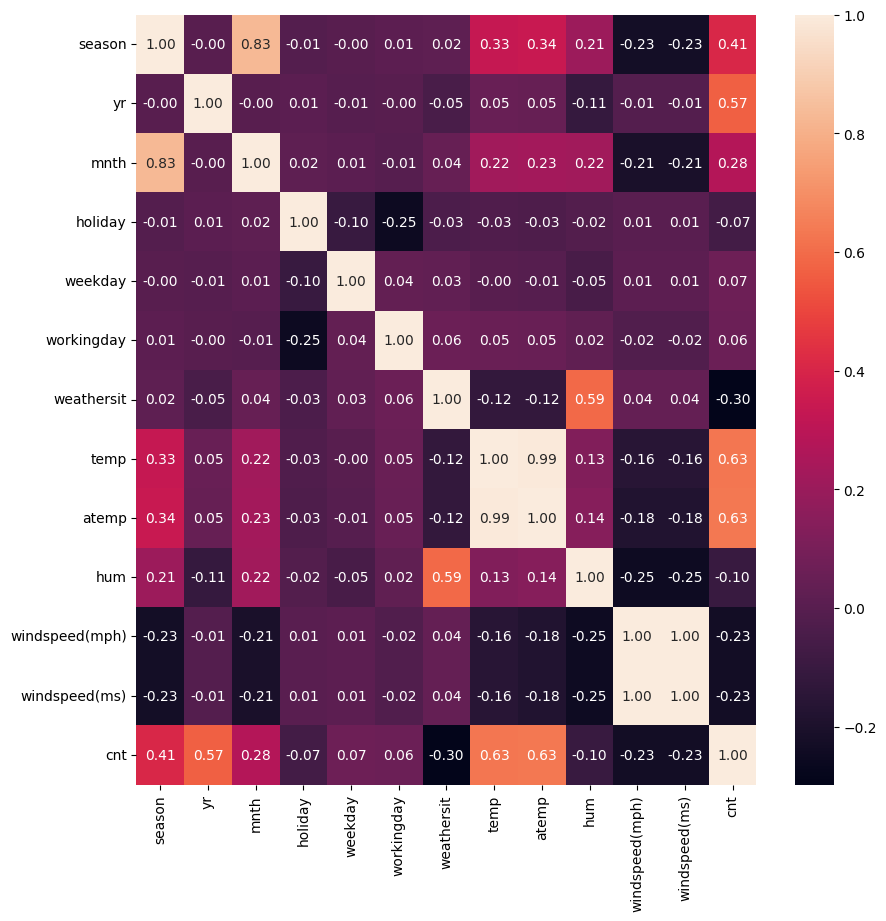

In [9]:
corr = df.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: представлены данные за два года, и на второй год прокат велосипедов увеличился, поэтому, если мы рассматриваем только эти два года, то можно сделать вывод, чем больше год, тем больше прокат велосипедов

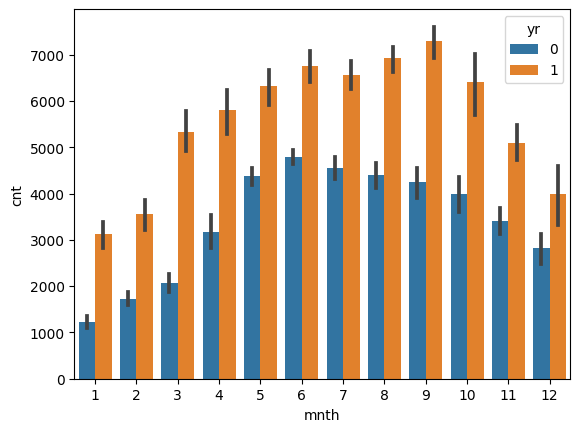

In [10]:
sns.barplot(
    x='mnth',
    y='cnt',
    data=df,
    hue='yr');

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: в первом графике видно, что количество дней недели в датасете примерно одинаковое. Это значит, что статистику собирали каждый день в течение двух лет.
Также в не собранные дни люди могли не пользоваться прокатом из-за плохой погоды

Ответ: больше всего распределение значений признака weekday похоже на равномерное, поскольку значения для каждого из дней примерно равны.
    

<Axes: xlabel='weekday', ylabel='count'>

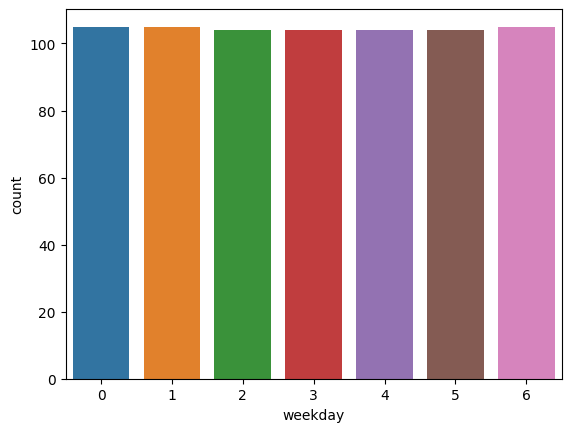

In [11]:
sns.countplot(df, x="weekday")

<Axes: xlabel='weathersit', ylabel='count'>

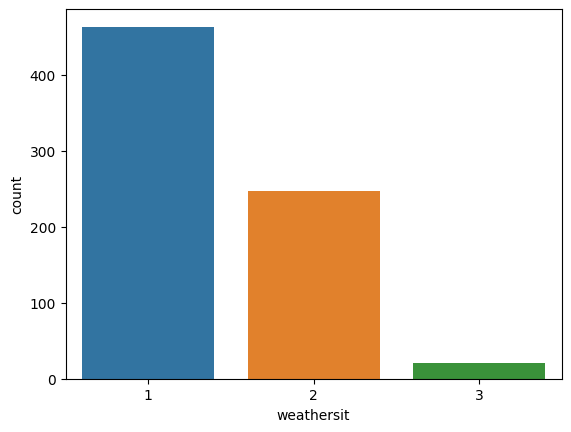

In [12]:
sns.countplot(data=df, x= "weathersit")

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: 4500

Ответ: нормальное

<Axes: xlabel='cnt', ylabel='Count'>

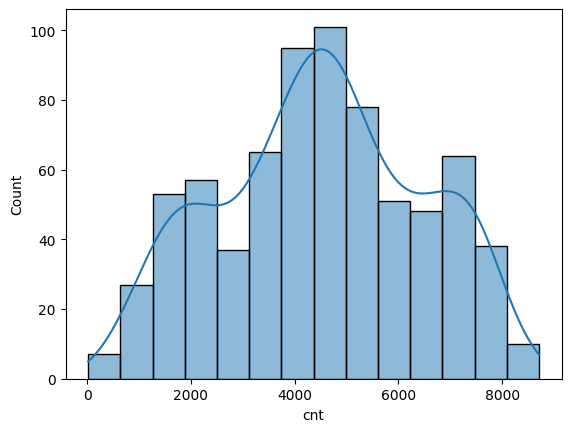

In [13]:
sns.histplot(df, x = "cnt", kde=True)

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

*Ответ*: нет отрицательных температур, температура идет плавно вверх. Также ощущение температуры 13 градусов при температуре в 30 градусов. Скорей всего это ошибка

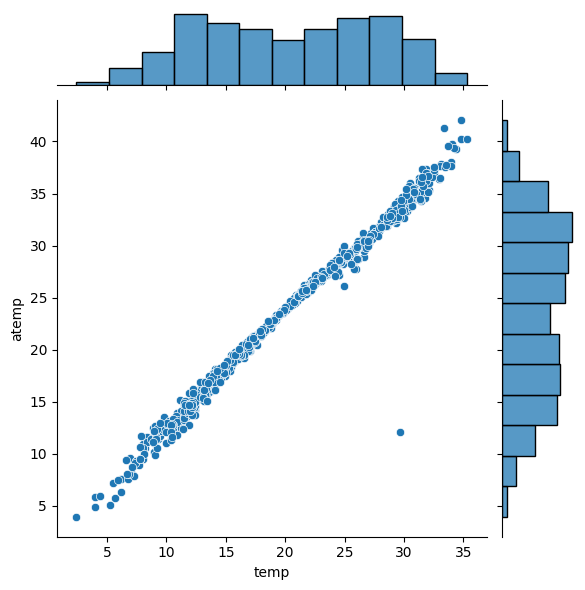

In [14]:
sns.jointplot(
    x='temp',
    y='atemp',
    data=df)

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: Период с мая по август является сезоном отпусков. Поэтому люди чаще берут велосипеды в выходной день, в теплую погоду велосипед является средством спорта и досуга. В остальные месяцы велосипед больше выступает как транспортна работу и учёбу. Поэтому люди арендуют велосипеды чаще в будние дни

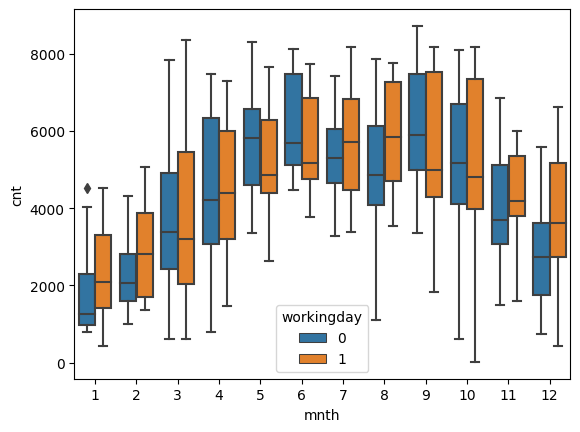

In [15]:
sns.boxplot(
    x='mnth',
    y='cnt',
    data=df,
    hue='workingday');